# Group 60 Notebook

## Contributions: Najib Rezai, Johnny Benstead, Zac West
## Project Summary:
> Transport for NSW, The movement density based on Opal card Tap on & off. The NSW transport system allows millions of people to travel to their destination daily. Hence, through properly analysing the movement of people, diverse businesses such as coffee shops, fast food and other advertisements companies could generate substantial profits.
By precisely analysing the data for transport NSW, the business management team would be able to infer what products would generate the most profits within a specified date.
Additionally, the analysis of transport for NSW data further allows the advertisement companies to decide what part of the NSW would be most suitable for advertising purposes.
## Purpose and goals:
> The main purpose of this project is to determine where best to place a new outlet and advertisements given data taken from the NSW Transport Opal card data. After analysing the inflow and outflow of people through different stations and bus stops, suitable locations can be identified for possible placements of these stores, outlets and advertisements. We will be basing our findings not only on the population density at specific times but also on age demographic given the type of Opal card used.
## Our progression goals are:
> * Analyse population density based on the weekly Opal card usage over time and create corresponding heat maps for significant times throughout the weeks.
> * Further analyse these heat maps by investigating age demographics from the type of Opal card used.
> * Use the monthly demographic data to determine the proportion of age groups using different train lines and bus stops and establish the best locations for advertisement based on the businesses target audience.
> * Further analysis into specific trends in the monthly data could also indicate when best to run advertisements; i.e., if there are specific periods of time where trains and/or buses on specific lines or routes are more commonly used.
## data obtained link:
* https://opendata.transport.nsw.gov.au/search/type/dataset

In [3]:
## Importing required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Linear Regression Library
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

# Importing naive bayes library
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Importing pre_processing data library
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

# Importing ignoring wornings library
import warnings
warnings.filterwarnings("ignore")

## Reading files obtained from offical NSW transport

In [4]:
# read the offical NSW transport 
time_loc_NOV = pd.read_csv("files/time-loc_16NOV.csv")
time_loc_MAR = pd.read_csv("files/time-loc_23MAR.csv")
time_loc_AUG = pd.read_csv("files/time-loc_24AUG.csv")
time_loc_FEB = pd.read_csv("files/time-loc_24FEB.csv")
time_loc_NOV.head()

,mode,date,tap,time,loc,count
0,bus,20201116,off,0:15,Sydney CBD_Wynyard Station_George St(57),19
1,bus,20201116,off,0:45,Bathurst St and Elizabeth St(116),21
2,bus,20201116,off,2:15,Sydney TAFE(144),19
3,bus,20201116,off,3:15,Sydney CBD_Defence Plaza(105),22
4,bus,20201116,off,4:00,2140,19


In [5]:
pc_time_loc_NOV = pd.read_csv("files/pc_time-loc_16NOV.csv")
pc_time_loc_MAR = pd.read_csv("files/pc_time-loc_23MAR.csv")
pc_time_loc_AUG = pd.read_csv("files/pc_time-loc_24AUG.csv")
pc_time_loc_FEB = pd.read_csv("files/pc_time-loc_24FEB.csv")
pc_time_loc_NOV.head()

,Unnamed: 0,mode,date,tap,time,loc,count
0,0,bus,20201116,off,0:15,2000,19
1,1,bus,20201116,off,0:45,2000,21
2,2,bus,20201116,off,2:15,2007,19
3,3,bus,20201116,off,3:15,2000,22
4,4,bus,20201116,off,4:00,2140,19


In [6]:
## print the keys for each datasets given.
print(time_loc_NOV.keys())
print(time_loc_MAR.keys())
print(time_loc_AUG.keys())
print(time_loc_FEB.keys())
## All the dataset are clean to work with. 

Index(['mode', 'date', 'tap', 'time', 'loc', 'count'], dtype='object')
Index(['mode', 'date', 'tap', 'time', 'loc', 'count'], dtype='object')
Index(['mode', 'date', 'tap', 'time', 'loc', 'count'], dtype='object')
Index(['mode', 'date', 'tap', 'time', 'loc', 'count'], dtype='object')


In [7]:
## Amount of data that we are analysing>
print("NOV DATASET IS:",time_loc_NOV.shape)
print("MAR DATASET IS:",time_loc_MAR.shape)
print("AUG DATASET IS:",time_loc_AUG.shape)
print("FEB DATASET IS:",time_loc_FEB.shape)


NOV DATASET IS: (199080, 6)
MAR DATASET IS: (114041, 6)
AUG DATASET IS: (176816, 6)
FEB DATASET IS: (276768, 6)


# Stops made per transport type

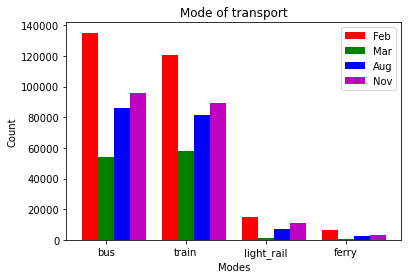

In [8]:
# creating values
    # feb
feb_bus = sum(time_loc_FEB['mode'] == 'bus')
feb_train = sum(time_loc_FEB['mode'] == 'train')
feb_light_rail = sum(time_loc_FEB['mode'] == 'light_rail')
feb_ferry = sum(time_loc_FEB['mode'] == 'ferry')
    # aug
aug_bus = sum(time_loc_AUG['mode'] == 'bus')
aug_train = sum(time_loc_AUG['mode'] == 'train')
aug_light_rail = sum(time_loc_AUG['mode'] == 'light_rail')
aug_ferry = sum(time_loc_AUG['mode'] == 'ferry')
    # mar
mar_bus = sum(time_loc_MAR['mode'] == 'bus')
mar_train = sum(time_loc_MAR['mode'] == 'train')
mar_light_rail = sum(time_loc_MAR['mode'] == 'light_rail')
mar_ferry = sum(time_loc_MAR['mode'] == 'ferry')
    # nov
nov_bus = sum(time_loc_NOV['mode'] == 'bus')
nov_train = sum(time_loc_NOV['mode'] == 'train')
nov_light_rail = sum(time_loc_NOV['mode'] == 'light_rail')
nov_ferry = sum(time_loc_NOV['mode'] == 'ferry')
# plotting graph
N = 4
ind = np.arange(N) 
width = 0.2
  
xvals = [feb_bus, feb_train, feb_light_rail, feb_ferry]
bar1 = plt.bar(ind, xvals, width, color = 'r')
  
yvals = [mar_bus, mar_train, mar_light_rail, mar_ferry]
bar2 = plt.bar(ind+width, yvals, width, color='g')
  
zvals = [aug_bus, aug_train, aug_light_rail, aug_ferry]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

avals = [nov_bus, nov_train, nov_light_rail, nov_ferry]
bar4 = plt.bar(ind+width*3, avals, width, color = 'm')
  
plt.xlabel("Modes")
plt.ylabel('Count')
plt.title("Mode of transport")
  
plt.xticks(ind+width,['bus', 'train', 'light_rail', 'ferry'])
plt.legend( (bar1, bar2, bar3, bar4), ('Feb', 'Mar', 'Aug', 'Nov') )
plt.show()

Bus counts = 370969
Train counts = 348623
Light Rail counts = 34491
Ferry counts = 12610


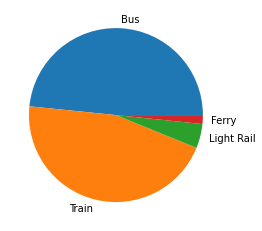

In [9]:
bus = str(nov_bus + aug_bus + mar_bus + feb_bus)
train = str(nov_train + aug_train + mar_train + feb_train)
light_rail = str(nov_light_rail + aug_light_rail + mar_light_rail + feb_light_rail)
ferry = str(nov_ferry + aug_ferry + mar_ferry + feb_ferry)

print("Bus counts = " + str( bus))
print("Train counts = " + str(train))
print("Light Rail counts = " + str(light_rail))
print("Ferry counts = " + str(ferry))
# pie char
transport = np.array([bus, train, light_rail, ferry])
mylabels = ["Bus", "Train", "Light Rail", "Ferry"]

plt.pie(transport, labels = mylabels)
plt.show() 

# People per transport type

NOV data
Ferry Passenger Counts = 188627
Light Rail Passenger Counts = 459026
Train Passenger Counts = 7903561
Bus Passenger Counts = 5387240


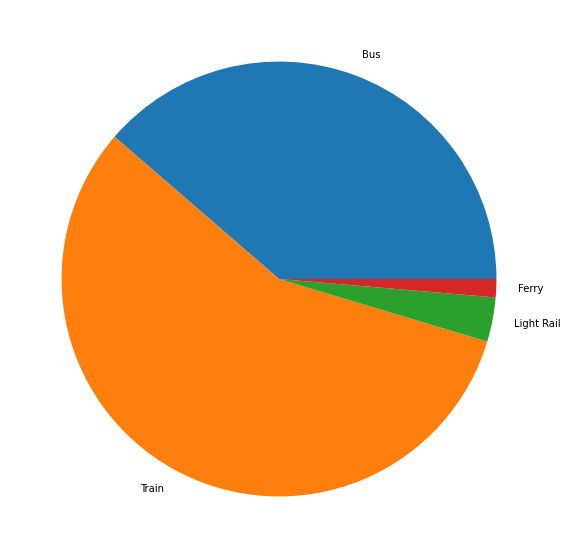

In [10]:
all_mode = ['bus', 'ferry', 'light_rail', 'train', 'unknown']
counts = list()
for i in all_mode:
    q = pc_time_loc_NOV.loc[pc_time_loc_NOV['mode'] == i, 'count'].sum()
    counts.append(q)

pc_time_loc_NOV_m = pd.DataFrame()
pc_time_loc_NOV_m['mode']=all_mode
pc_time_loc_NOV_m['Counts']=counts

bus_pc = str(pc_time_loc_NOV_m.iloc[0,1])
ferry_pc = str(pc_time_loc_NOV_m.iloc[1,1])
lr_pc = str(pc_time_loc_NOV_m.iloc[2,1])
train_pc = str(pc_time_loc_NOV_m.iloc[3,1])

print("NOV data")
print("Ferry Passenger Counts = " + ferry_pc)
print("Light Rail Passenger Counts = " + lr_pc)
print("Train Passenger Counts = " + train_pc)
print("Bus Passenger Counts = " + bus_pc)

plt.rcParams["figure.figsize"] = (50, 10)

transport = np.array([bus_pc, train_pc, lr_pc, ferry_pc])
mylabels = ["Bus", "Train", "Light Rail", "Ferry"]

plt.pie(transport, labels = mylabels)
plt.show() 

AUG data
Ferry Passenger Counts = 143761
Light Rail Passenger Counts = 257714
Train Passenger Counts = 6513489
Bus Passenger Counts = 4560946


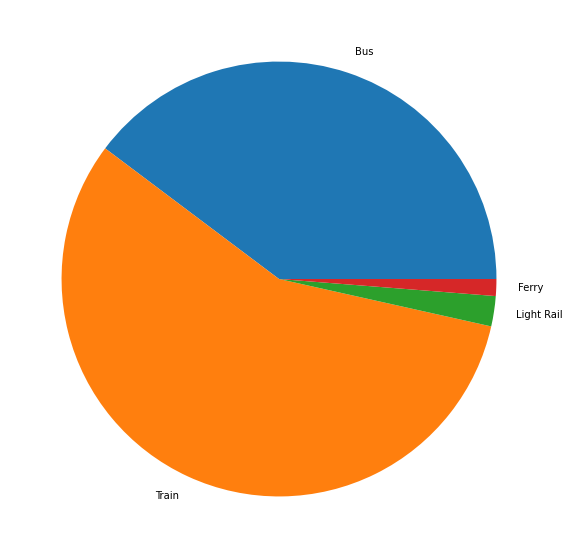

In [11]:
all_mode = ['bus', 'ferry', 'light_rail', 'train', 'unknown']
counts = list()
for i in all_mode:
    q = pc_time_loc_AUG.loc[pc_time_loc_AUG['mode'] == i, 'count'].sum()
    counts.append(q)

pc_time_loc_AUG_m = pd.DataFrame()
pc_time_loc_AUG_m['mode']=all_mode
pc_time_loc_AUG_m['Counts']=counts

a_bus_pc = str(pc_time_loc_AUG_m.iloc[0,1])
a_ferry_pc = str(pc_time_loc_AUG_m.iloc[1,1])
a_lr_pc = str(pc_time_loc_AUG_m.iloc[2,1])
a_train_pc = str(pc_time_loc_AUG_m.iloc[3,1])

print("AUG data")
print("Ferry Passenger Counts = " + a_ferry_pc)
print("Light Rail Passenger Counts = " + a_lr_pc)
print("Train Passenger Counts = " + a_train_pc)
print("Bus Passenger Counts = " + a_bus_pc)

plt.rcParams["figure.figsize"] = (50, 10)

transport = np.array([a_bus_pc, a_train_pc, a_lr_pc, a_ferry_pc])
mylabels = ["Bus", "Train", "Light Rail", "Ferry"]

plt.pie(transport, labels = mylabels)
plt.show() 

FEB data
Ferry Passenger Counts = 539694
Light Rail Passenger Counts = 835833
Train Passenger Counts = 16155801
Bus Passenger Counts = 10820120


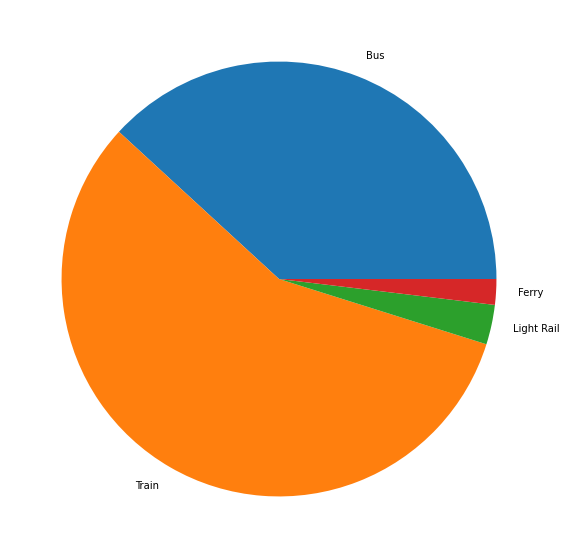

In [12]:
all_mode = ['bus', 'ferry', 'light_rail', 'train', 'unknown']
counts = list()
for i in all_mode:
    q = pc_time_loc_FEB.loc[pc_time_loc_FEB['mode'] == i, 'count'].sum()
    counts.append(q)

pc_time_loc_FEB_m = pd.DataFrame()
pc_time_loc_FEB_m['mode']=all_mode
pc_time_loc_FEB_m['mode']=all_mode
pc_time_loc_FEB_m['Counts']=counts

F_bus_pc = str(pc_time_loc_FEB_m.iloc[0,1])
F_ferry_pc = str(pc_time_loc_FEB_m.iloc[1,1])
F_lr_pc = str(pc_time_loc_FEB_m.iloc[2,1])
F_train_pc = str(pc_time_loc_FEB_m.iloc[3,1])

print("FEB data")
print("Ferry Passenger Counts = " + F_ferry_pc)
print("Light Rail Passenger Counts = " + F_lr_pc)
print("Train Passenger Counts = " + F_train_pc)
print("Bus Passenger Counts = " + F_bus_pc)

plt.rcParams["figure.figsize"] = (50, 10)

transport = np.array([F_bus_pc, F_train_pc, F_lr_pc, F_ferry_pc])
mylabels = ["Bus", "Train", "Light Rail", "Ferry"]

plt.pie(transport, labels = mylabels)
plt.show() 

March data
Ferry Passenger Counts = 25822
Light Rail Passenger Counts = 41087
Train Passenger Counts = 3852869
Bus Passenger Counts = 2422326


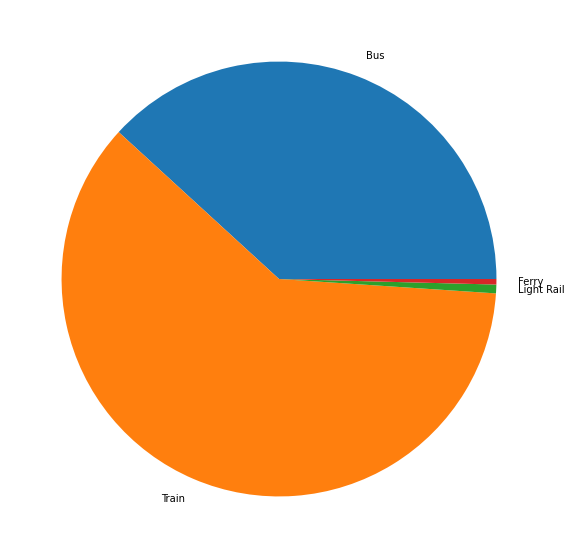

In [13]:
all_mode = ['bus', 'ferry', 'light_rail', 'train', 'unknown']
counts = list()
for i in all_mode:
    q = pc_time_loc_MAR.loc[pc_time_loc_MAR['mode'] == i, 'count'].sum()
    counts.append(q)

pc_time_loc_MAR_m = pd.DataFrame()
pc_time_loc_MAR_m['mode']=all_mode
pc_time_loc_MAR_m['mode']=all_mode
pc_time_loc_MAR_m['Counts']=counts

M_bus_pc = str(pc_time_loc_MAR_m.iloc[0,1])
M_ferry_pc = str(pc_time_loc_MAR_m.iloc[1,1])
M_lr_pc = str(pc_time_loc_MAR_m.iloc[2,1])
M_train_pc = str(pc_time_loc_MAR_m.iloc[3,1])

print("March data")
print("Ferry Passenger Counts = " + M_ferry_pc)
print("Light Rail Passenger Counts = " + M_lr_pc)
print("Train Passenger Counts = " + M_train_pc)
print("Bus Passenger Counts = " + M_bus_pc)

plt.rcParams["figure.figsize"] = (50, 10)

transport = np.array([M_bus_pc, M_train_pc, M_lr_pc, M_ferry_pc])
mylabels = ["Bus", "Train", "Light Rail", "Ferry"]

plt.pie(transport, labels = mylabels)
plt.show() 

All data
Ferry Passenger Counts = 897904 or 1.493819882226494 %
Light Rail Passenger Counts = 1593660 or 2.651331315495949 %
Train Passenger Counts = 34425720 or 57.273188443265944 %
Bus Passenger Counts = 23190632 or 38.581660359011615 %
Total Passenger Count = 60107916


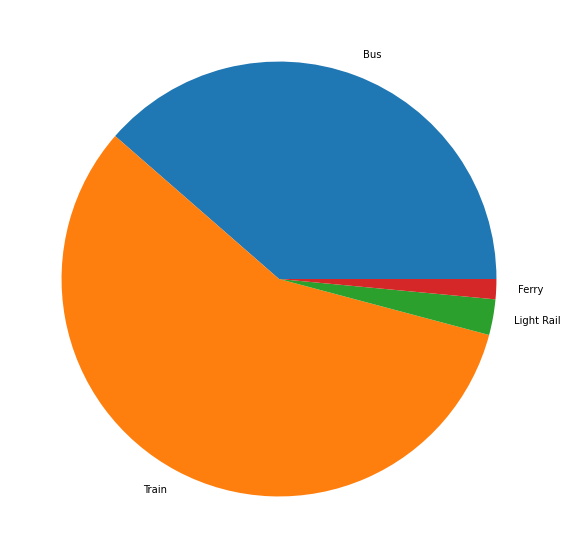

In [14]:
ferry_data = int(F_ferry_pc) + int(M_ferry_pc) + int(a_ferry_pc) + int(ferry_pc)
lr_data = int(F_lr_pc) + int(M_lr_pc) + int(a_lr_pc) + int(lr_pc)
train_data = int(F_train_pc) + int(M_train_pc) + int(a_train_pc) + int(train_pc)
bus_data = int(F_bus_pc) + int(M_bus_pc) + int(a_bus_pc) + int(bus_pc)
passenger_data = int(ferry_data) + int(lr_data) + int(train_data) + int(bus_data)

print("All data")
print("Ferry Passenger Counts = " + str(ferry_data) + " or " + str((ferry_data/passenger_data)*100) + " %")
print("Light Rail Passenger Counts = " + str(lr_data) + " or " + str((lr_data/passenger_data)*100) + " %")
print("Train Passenger Counts = " + str(train_data) + " or " + str((train_data/passenger_data)*100) + " %")
print("Bus Passenger Counts = " + str(bus_data) + " or " + str((bus_data/passenger_data)*100) + " %")
print("Total Passenger Count = " + str(passenger_data))
plt.rcParams["figure.figsize"] = (50, 10)

transport = np.array([bus_data, train_data, lr_data, ferry_data])
mylabels = ["Bus", "Train", "Light Rail", "Ferry"]

plt.pie(transport, labels = mylabels)
plt.show() 

In [15]:
# drop data with dats that are not 16/11/2020
pc_time_loc_11_16_2020 = pc_time_loc_NOV.drop(pc_time_loc_NOV.index[pc_time_loc_NOV['date'] != 20201116])
pc_time_loc_11_16_2020.head()

,Unnamed: 0,mode,date,tap,time,loc,count
0,0,bus,20201116,off,0:15,2000,19
1,1,bus,20201116,off,0:45,2000,21
2,2,bus,20201116,off,2:15,2007,19
3,3,bus,20201116,off,3:15,2000,22
4,4,bus,20201116,off,4:00,2140,19


<BarContainer object of 29557 artists>

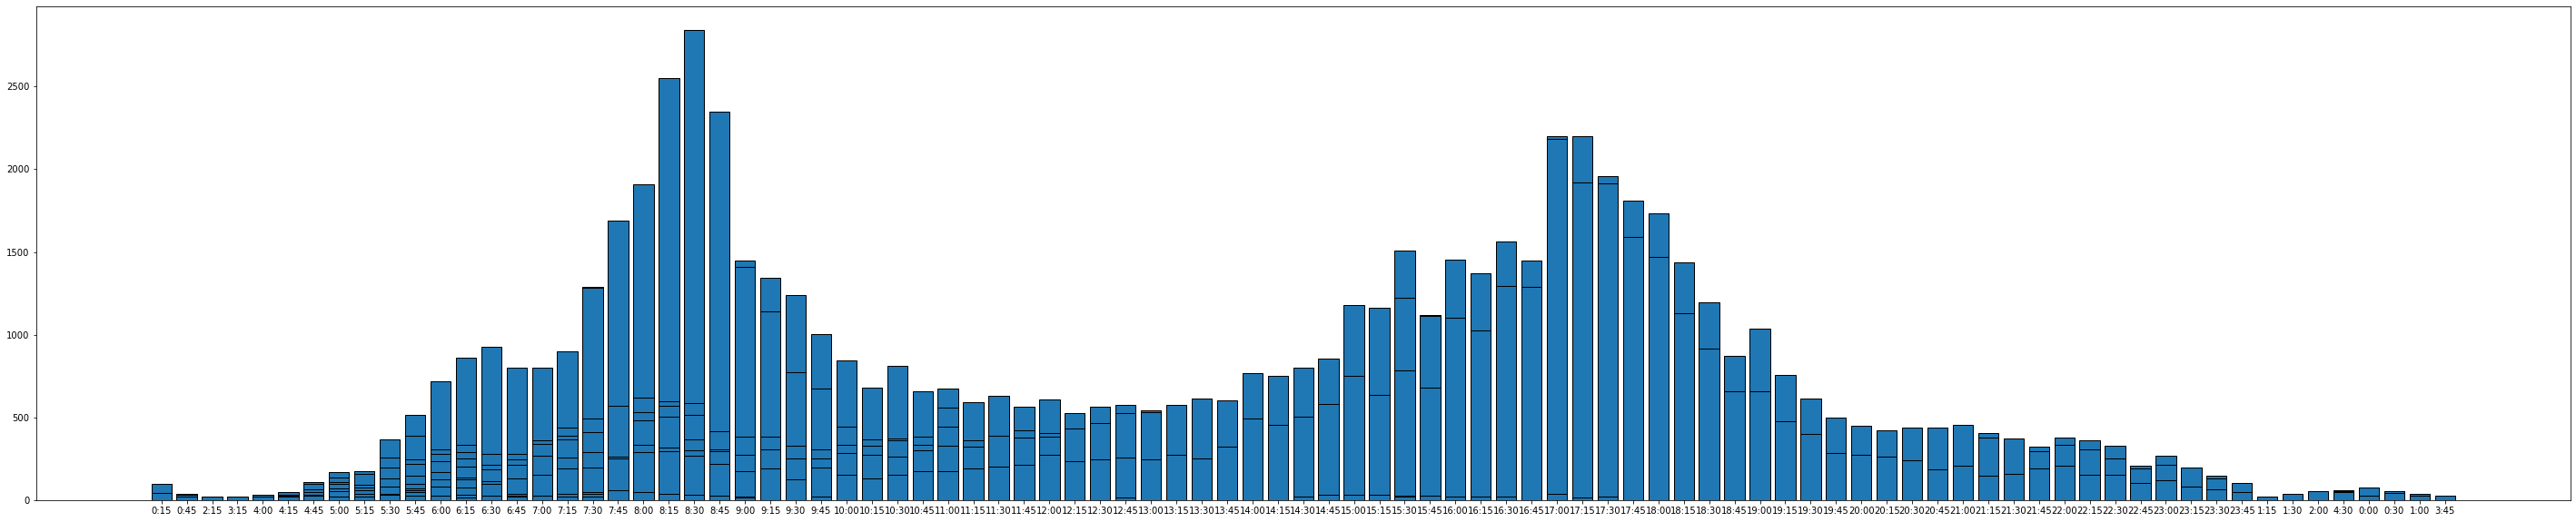

In [16]:
# ploting volume of tap on/off vs. time of day on 16/11/2020 - monday
plt.rcParams["figure.figsize"] = (50, 10)
plt.bar(x = pc_time_loc_11_16_2020['time'], height = pc_time_loc_11_16_2020['count'], edgecolor="k")

In [17]:
# drop data with dats that are not 18/11/2020 - Wednesday
pc_time_loc_11_18_2020 = pc_time_loc_NOV.drop(pc_time_loc_NOV.index[pc_time_loc_NOV['date'] != 20201118])
pc_time_loc_11_18_2020.head()

,Unnamed: 0,mode,date,tap,time,loc,count
30133,30133,bus,20201118,off,0:00,2150,31
30134,30134,bus,20201118,off,1:15,2000,20
30135,30135,bus,20201118,off,1:30,2000,19
30136,30136,bus,20201118,off,4:45,2170,30
30137,30137,bus,20201118,off,4:45,2256,19


<BarContainer object of 32140 artists>

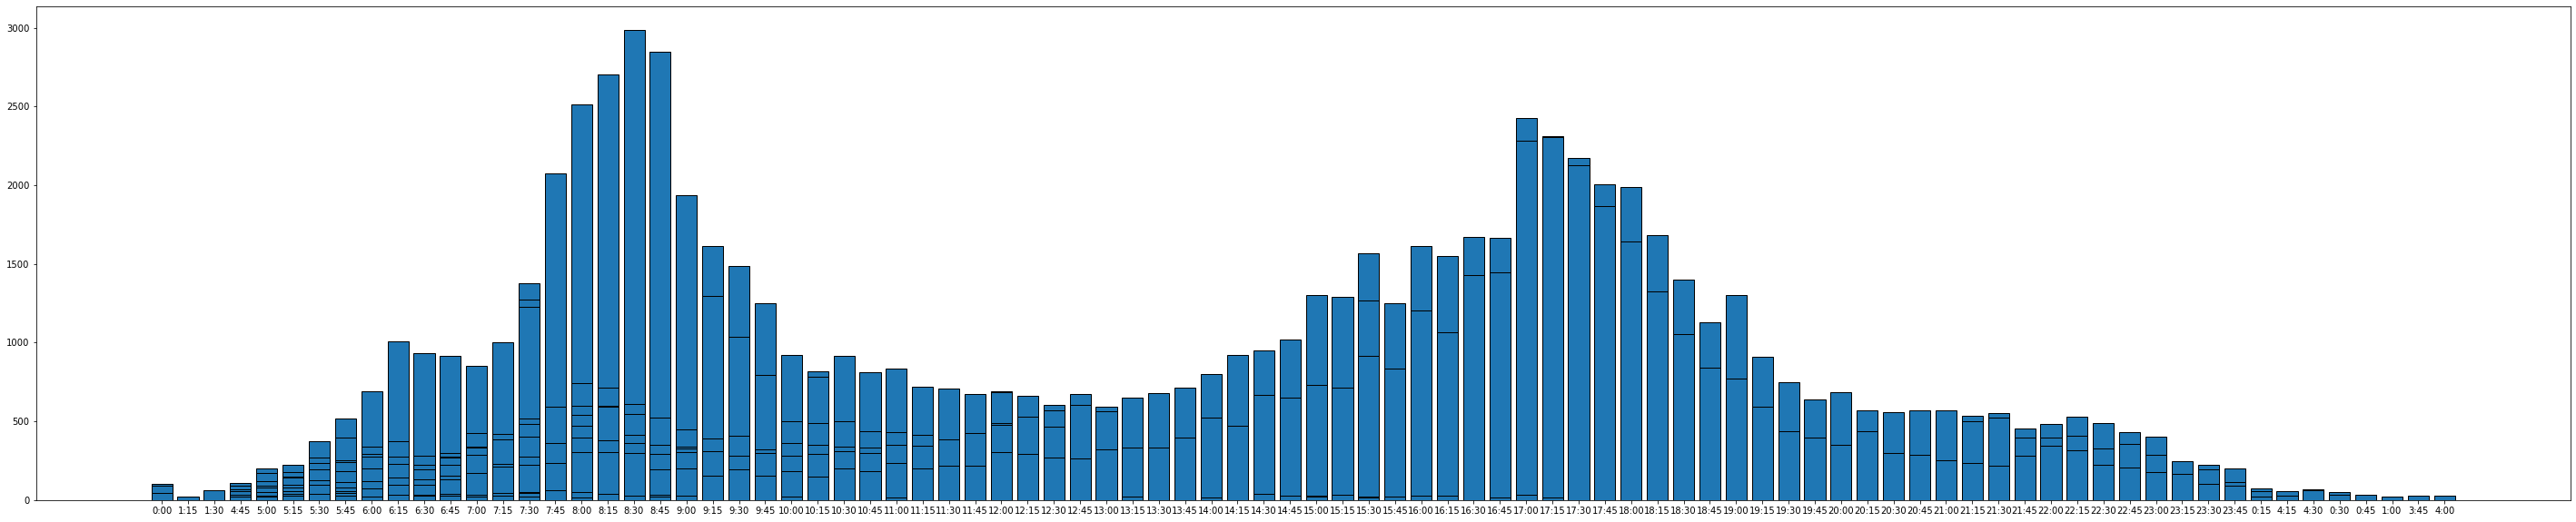

In [18]:
# ploting volume of tap on/off vs. time of day on 18/11/2020 - wednesday
plt.rcParams["figure.figsize"] = (50, 10)
plt.bar(x = pc_time_loc_11_18_2020['time'], height = pc_time_loc_11_18_2020['count'], edgecolor="k")

In [19]:
# drop data with dats that are not 19/11/2020 - Friday
pc_time_loc_11_19_2020 = pc_time_loc_NOV.drop(pc_time_loc_NOV.index[pc_time_loc_NOV['date'] != 20201119])
pc_time_loc_11_19_2020.head()

,Unnamed: 0,mode,date,tap,time,loc,count
45975,45975,bus,20201119,off,0:00,2026,25
45976,45976,bus,20201119,off,0:00,2150,23
45977,45977,bus,20201119,off,0:15,2000,23
45978,45978,bus,20201119,off,1:00,2000,18
45979,45979,bus,20201119,off,1:15,2000,25


<BarContainer object of 32935 artists>

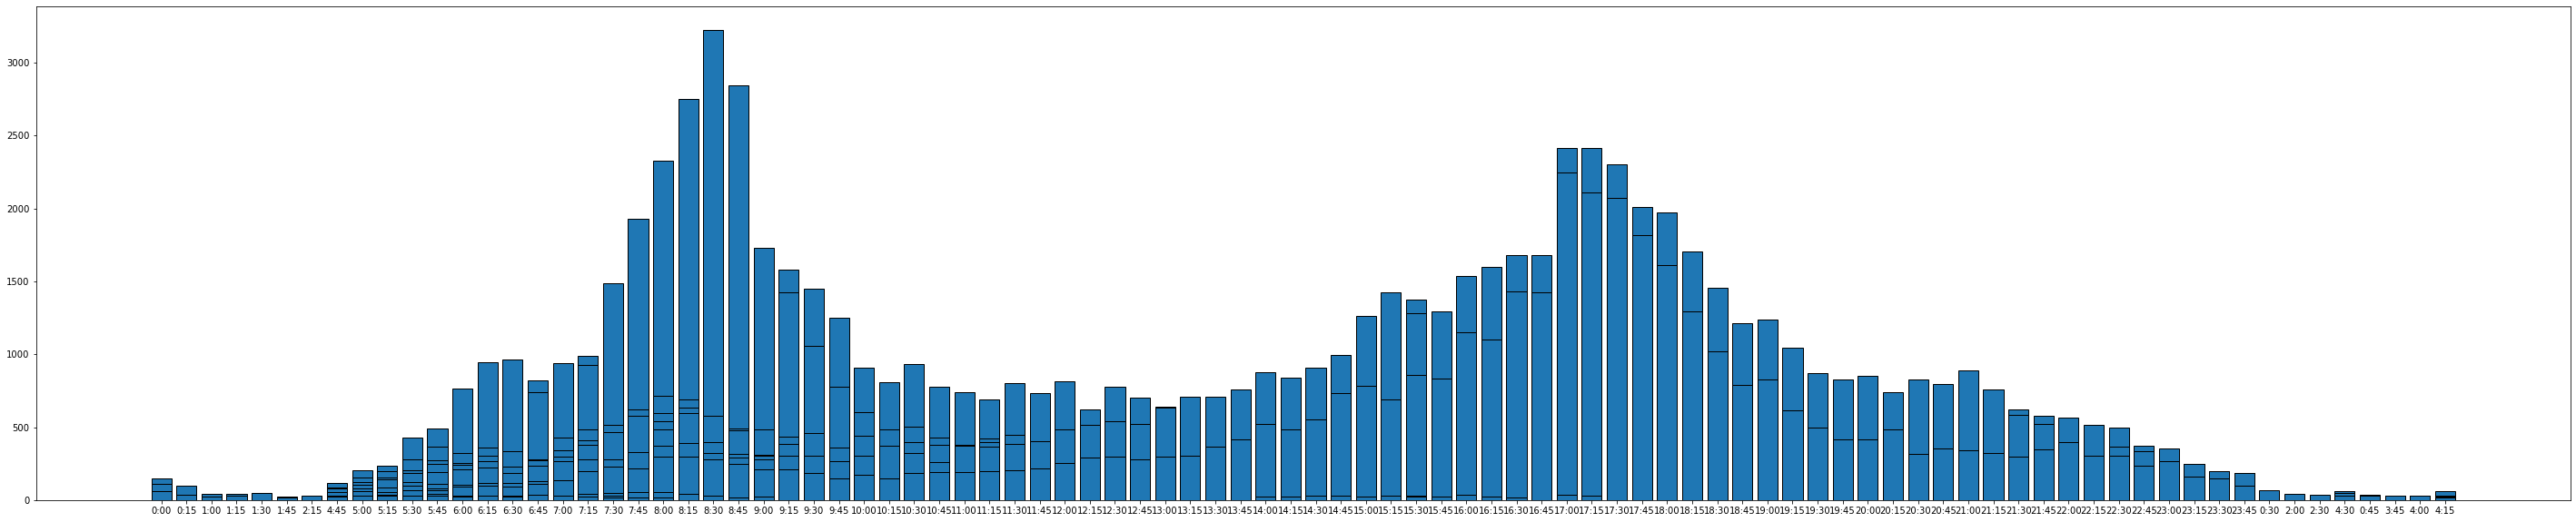

In [20]:
# ploting volume of tap on/off vs. time of day on 19/11/2020 - Friday
plt.rcParams["figure.figsize"] = (50, 10)
plt.bar(x = pc_time_loc_11_19_2020['time'], height = pc_time_loc_11_19_2020['count'], edgecolor="k")

In [21]:
# drop data with dats that are not 10/11/2020 - Saturday
pc_time_loc_11_20_2020 = pc_time_loc_NOV.drop(pc_time_loc_NOV.index[pc_time_loc_NOV['date'] != 20201120])
pc_time_loc_11_20_2020.head()

,Unnamed: 0,mode,date,tap,time,loc,count
62210,62210,bus,20201120,off,0:00,2026,22
62211,62211,bus,20201120,off,0:00,2000,27
62212,62212,bus,20201120,off,0:15,2026,21
62213,62213,bus,20201120,off,0:15,2000,31
62214,62214,bus,20201120,off,1:15,2000,23


<BarContainer object of 33016 artists>

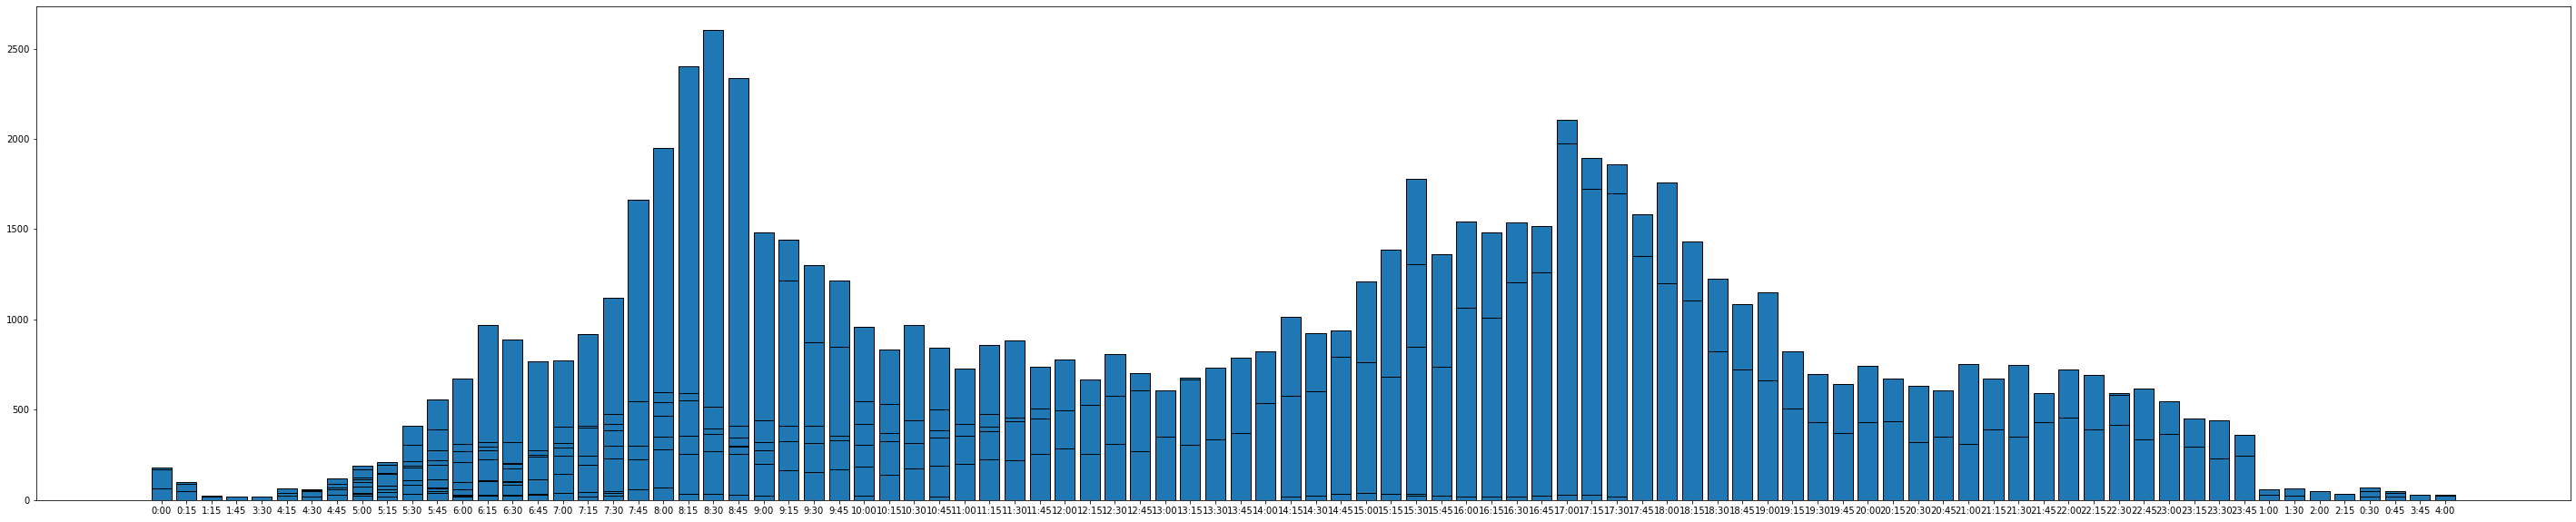

In [22]:
# ploting volume of tap on/off vs. time of day on 20/11/2020 - Saturday
plt.rcParams["figure.figsize"] = (50, 10)
plt.bar(x = pc_time_loc_11_20_2020['time'], height = pc_time_loc_11_20_2020['count'], edgecolor="k")

In [23]:
# drop data with dats that are not 21/11/2020 - Sunday
pc_time_loc_11_21_2020 = pc_time_loc_NOV.drop(pc_time_loc_NOV.index[pc_time_loc_NOV['date'] != 20201121])
pc_time_loc_11_21_2020.head()

,Unnamed: 0,mode,date,tap,time,loc,count
78223,78223,bus,20201121,off,0:00,2022,50
78224,78224,bus,20201121,off,0:00,2026,34
78225,78225,bus,20201121,off,0:00,2035,20
78226,78226,bus,20201121,off,0:00,2042,30
78227,78227,bus,20201121,off,0:00,2066,25


<BarContainer object of 22719 artists>

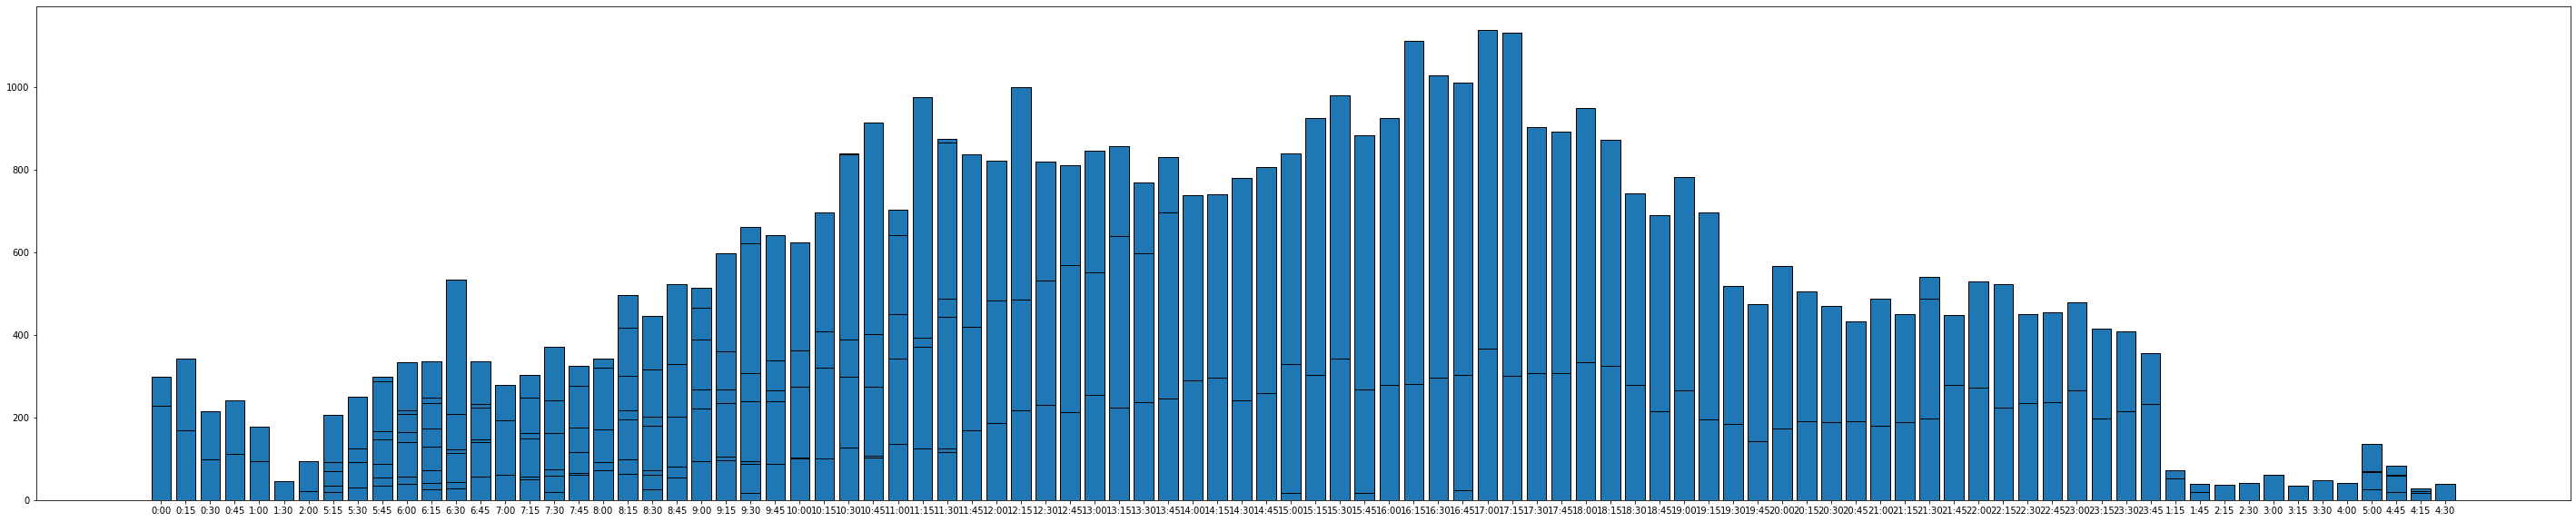

In [24]:
# ploting volume of tap on/off vs. time of day on 21/11/2020 - Sunday
plt.rcParams["figure.figsize"] = (50, 10)
plt.bar(x = pc_time_loc_11_21_2020['time'], height = pc_time_loc_11_21_2020['count'], edgecolor="k")

In [25]:
# creating counts per postcode
rpc1 = pc_time_loc_NOV['loc'].unique()
rpc2 = pc_time_loc_MAR['loc'].unique()
rpc3 = pc_time_loc_AUG['loc'].unique()
rpc4 = pc_time_loc_FEB['loc'].unique()
rpc = list()
for i in rpc1 :
    rpc.append(i)
for i in rpc2 :
    rpc.append(i)
for i in rpc3 :
    rpc.append(i)
for i in rpc4 :
    rpc.append(i)
all_postcodes = []
for i in rpc:
    if i not in all_postcodes:
        all_postcodes.append(i)
all_postcodes.sort()

counts = list()

for i in all_postcodes:
    w = pc_time_loc_NOV.loc[pc_time_loc_NOV['loc'] == i, 'count'].sum()
    x = pc_time_loc_MAR.loc[pc_time_loc_MAR['loc'] == i, 'count'].sum()
    y = pc_time_loc_AUG.loc[pc_time_loc_AUG['loc'] == i, 'count'].sum()
    z = pc_time_loc_FEB.loc[pc_time_loc_FEB['loc'] == i, 'count'].sum()
    q = w + x + y + z
    counts.append(q)

pc_time_loc_1 = pd.DataFrame()
pc_time_loc_1['Postcodes']=all_postcodes
pc_time_loc_1['Counts']=counts
pc_time_loc_1 = pc_time_loc_1.drop([0])

pc_time_loc_1.sort_values(['Counts'], ascending=False).head()

,Postcodes,Counts
1,2000,13654682
126,2150,2215851
15,2022,1604757
52,2067,1227737
113,2135,1118240


In [31]:
# amount of people who traveled in November 2020
print("Volume of people who took public transport in all the data sets combined (Febuary, March, August & November in 2020) is " + str(sum(pc_time_loc_1['Counts'])))

Volume of people who took public transport in all the data sets combined (Febuary, March, August & November in 2020) is 59932803
